In [1]:
import torch
import torchvision.datasets as tvds
import torch.utils.data as dt 
from torchvision import transforms 
import matplotlib.pyplot as plt 
import numpy as np 
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
import torchvision

In [14]:
#hyperparameter
batch_size = 64
nepoch = 15
learning_rate = 0.01

In [15]:
# tranform 
transform = transforms.Compose([
    transforms.ToTensor(), 
    transforms.Normalize((0.5,), (0.5,))
])

In [16]:
# get data
train_set = tvds.MNIST(root='datasets/MNIST', train=True, transform=transform, download=True)
test_set = tvds.MNIST(root='datasets/MNIST', train=False, transform=transform, download=True)
train_data = dt.DataLoader(dataset=train_set, batch_size=batch_size, shuffle=True)
test_data = dt.DataLoader(dataset=test_set, batch_size=batch_size, shuffle=False)
classes = {'0', '1', '2', '3', '4', '5', '6', '7', '8', '9'}

size train_set:60000
size test_set: 10000 
size each image: torch.Size([1, 28, 28])


(tensor([[[-1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000,
           -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000,
           -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000,
           -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000],
          [-1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000,
           -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000,
           -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000,
           -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000],
          [-1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000,
           -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000,
           -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000,
           -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000],
          [-1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000,
           -1.0000, -1.0000, -1.000

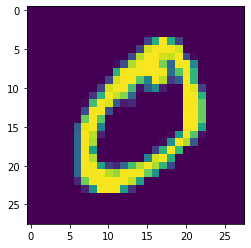

In [17]:
#imform from data and set
data = train_set.data
target = train_set.targets
img, lable = train_set[1]
print(f"size train_set:{len(train_set)}")
print(f"size test_set: {len(test_set)} ")
print(f"size each image: {img.size()}")
test = img.squeeze()
plt.imshow(test)
train_set[1]


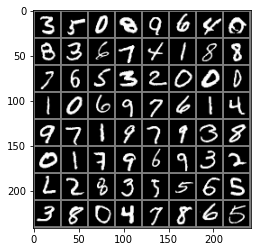

In [18]:
# vizualizing some image
def imshow(img): 
    img = img/2 + 0.5
    nimg = img.numpy()
    nimg = np.transpose(img, (1, 2, 0))
    plt.imshow(nimg)
dataiter = iter(train_data)
ig, lb = next(dataiter)
imshow(torchvision.utils.make_grid(ig))

In [23]:
class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.conv1 = nn.Conv2d(in_channels=1, out_channels=10, kernel_size=5, padding=0)
        self.conv2 = nn.Conv2d(in_channels=10, out_channels=20, kernel_size=5, padding=0)
        self.fc1 = nn.Linear(in_features=320, out_features=50)
        self.drop_fc1 = nn.Dropout(p=0.2)
        self.fc2 = nn.Linear(in_features=50, out_features=10)
    def forward(self, x): 
        x = F.relu(F.max_pool2d(self.conv1(x), 2))
        x = F.relu(F.max_pool2d(self.conv2(x), 2))
        x = x.view(-1, 320)
        x = self.fc1(x)
        x = self.drop_fc1(x)
        x = self.fc2(x)
        x = F.log_softmax(x, dim=1)
        return x
        

In [42]:
# imform model 
device = torch.device('cpu')
model = Net().to(device)
loss = nn.CrossEntropyLoss()
optimazer = optim.SGD(model.parameters(), lr=learning_rate)

In [27]:
def train(model, epoch, loss, optimazer, train_data, log_interval):
    model.train()
    for idx, (batch_img, batch_lable) in enumerate(train_data):
        optimazer.zero_grad()
        out_train = model(batch_img)
        loss_fn = loss(out_train, batch_lable)
        loss_fn.backward()
        optimazer.step()
        if idx % log_interval == 0: 
            print('Eporch %d [%d/ %5d] loss : %.3f' % 
                  (epoch, idx * len(batch_img), len(train_data.dataset), loss_fn.item()))    

In [28]:
def acurracy():
    pass


In [29]:
#setup 
log_interval = 10 
for epoch in range(1, nepoch+1): 
    train(model, epoch, loss, optimazer, train_data, log_interval)

Eporch 1 [0/ 60000] loss : 2.331
Eporch 1 [640/ 60000] loss : 2.311
Eporch 1 [1280/ 60000] loss : 2.334
Eporch 1 [1920/ 60000] loss : 2.317
Eporch 1 [2560/ 60000] loss : 2.301
Eporch 1 [3200/ 60000] loss : 2.291
Eporch 1 [3840/ 60000] loss : 2.281
Eporch 1 [4480/ 60000] loss : 2.260
Eporch 1 [5120/ 60000] loss : 2.263
Eporch 1 [5760/ 60000] loss : 2.263
Eporch 1 [6400/ 60000] loss : 2.249
Eporch 1 [7040/ 60000] loss : 2.231
Eporch 1 [7680/ 60000] loss : 2.215
Eporch 1 [8320/ 60000] loss : 2.220
Eporch 1 [8960/ 60000] loss : 2.177
Eporch 1 [9600/ 60000] loss : 2.181
Eporch 1 [10240/ 60000] loss : 2.145
Eporch 1 [10880/ 60000] loss : 2.139
Eporch 1 [11520/ 60000] loss : 2.134
Eporch 1 [12160/ 60000] loss : 2.098
Eporch 1 [12800/ 60000] loss : 2.064
Eporch 1 [13440/ 60000] loss : 2.001
Eporch 1 [14080/ 60000] loss : 1.951
Eporch 1 [14720/ 60000] loss : 1.827
Eporch 1 [15360/ 60000] loss : 1.832
Eporch 1 [16000/ 60000] loss : 1.660
Eporch 1 [16640/ 60000] loss : 1.734
Eporch 1 [17280/ 6000

Eporch 3 [23040/ 60000] loss : 0.164
Eporch 3 [23680/ 60000] loss : 0.107
Eporch 3 [24320/ 60000] loss : 0.401
Eporch 3 [24960/ 60000] loss : 0.314
Eporch 3 [25600/ 60000] loss : 0.104
Eporch 3 [26240/ 60000] loss : 0.080
Eporch 3 [26880/ 60000] loss : 0.247
Eporch 3 [27520/ 60000] loss : 0.182
Eporch 3 [28160/ 60000] loss : 0.212
Eporch 3 [28800/ 60000] loss : 0.069
Eporch 3 [29440/ 60000] loss : 0.184
Eporch 3 [30080/ 60000] loss : 0.082
Eporch 3 [30720/ 60000] loss : 0.147
Eporch 3 [31360/ 60000] loss : 0.196
Eporch 3 [32000/ 60000] loss : 0.197
Eporch 3 [32640/ 60000] loss : 0.216
Eporch 3 [33280/ 60000] loss : 0.097
Eporch 3 [33920/ 60000] loss : 0.115
Eporch 3 [34560/ 60000] loss : 0.270
Eporch 3 [35200/ 60000] loss : 0.181
Eporch 3 [35840/ 60000] loss : 0.091
Eporch 3 [36480/ 60000] loss : 0.097
Eporch 3 [37120/ 60000] loss : 0.058
Eporch 3 [37760/ 60000] loss : 0.146
Eporch 3 [38400/ 60000] loss : 0.266
Eporch 3 [39040/ 60000] loss : 0.164
Eporch 3 [39680/ 60000] loss : 0.149
E

Eporch 5 [45440/ 60000] loss : 0.233
Eporch 5 [46080/ 60000] loss : 0.021
Eporch 5 [46720/ 60000] loss : 0.152
Eporch 5 [47360/ 60000] loss : 0.123
Eporch 5 [48000/ 60000] loss : 0.038
Eporch 5 [48640/ 60000] loss : 0.076
Eporch 5 [49280/ 60000] loss : 0.371
Eporch 5 [49920/ 60000] loss : 0.055
Eporch 5 [50560/ 60000] loss : 0.245
Eporch 5 [51200/ 60000] loss : 0.066
Eporch 5 [51840/ 60000] loss : 0.068
Eporch 5 [52480/ 60000] loss : 0.020
Eporch 5 [53120/ 60000] loss : 0.106
Eporch 5 [53760/ 60000] loss : 0.145
Eporch 5 [54400/ 60000] loss : 0.222
Eporch 5 [55040/ 60000] loss : 0.099
Eporch 5 [55680/ 60000] loss : 0.027
Eporch 5 [56320/ 60000] loss : 0.044
Eporch 5 [56960/ 60000] loss : 0.101
Eporch 5 [57600/ 60000] loss : 0.175
Eporch 5 [58240/ 60000] loss : 0.049
Eporch 5 [58880/ 60000] loss : 0.088
Eporch 5 [59520/ 60000] loss : 0.267
Eporch 6 [0/ 60000] loss : 0.033
Eporch 6 [640/ 60000] loss : 0.089
Eporch 6 [1280/ 60000] loss : 0.109
Eporch 6 [1920/ 60000] loss : 0.035
Eporch 6 

Eporch 8 [7680/ 60000] loss : 0.052
Eporch 8 [8320/ 60000] loss : 0.061
Eporch 8 [8960/ 60000] loss : 0.027
Eporch 8 [9600/ 60000] loss : 0.064
Eporch 8 [10240/ 60000] loss : 0.126
Eporch 8 [10880/ 60000] loss : 0.333
Eporch 8 [11520/ 60000] loss : 0.024
Eporch 8 [12160/ 60000] loss : 0.305
Eporch 8 [12800/ 60000] loss : 0.051
Eporch 8 [13440/ 60000] loss : 0.105
Eporch 8 [14080/ 60000] loss : 0.098
Eporch 8 [14720/ 60000] loss : 0.024
Eporch 8 [15360/ 60000] loss : 0.079
Eporch 8 [16000/ 60000] loss : 0.078
Eporch 8 [16640/ 60000] loss : 0.096
Eporch 8 [17280/ 60000] loss : 0.035
Eporch 8 [17920/ 60000] loss : 0.091
Eporch 8 [18560/ 60000] loss : 0.110
Eporch 8 [19200/ 60000] loss : 0.030
Eporch 8 [19840/ 60000] loss : 0.079
Eporch 8 [20480/ 60000] loss : 0.019
Eporch 8 [21120/ 60000] loss : 0.031
Eporch 8 [21760/ 60000] loss : 0.085
Eporch 8 [22400/ 60000] loss : 0.029
Eporch 8 [23040/ 60000] loss : 0.076
Eporch 8 [23680/ 60000] loss : 0.044
Eporch 8 [24320/ 60000] loss : 0.051
Eporc

Eporch 10 [29440/ 60000] loss : 0.035
Eporch 10 [30080/ 60000] loss : 0.027
Eporch 10 [30720/ 60000] loss : 0.046
Eporch 10 [31360/ 60000] loss : 0.022
Eporch 10 [32000/ 60000] loss : 0.050
Eporch 10 [32640/ 60000] loss : 0.013
Eporch 10 [33280/ 60000] loss : 0.122
Eporch 10 [33920/ 60000] loss : 0.105
Eporch 10 [34560/ 60000] loss : 0.017
Eporch 10 [35200/ 60000] loss : 0.036
Eporch 10 [35840/ 60000] loss : 0.028
Eporch 10 [36480/ 60000] loss : 0.004
Eporch 10 [37120/ 60000] loss : 0.036
Eporch 10 [37760/ 60000] loss : 0.032
Eporch 10 [38400/ 60000] loss : 0.190
Eporch 10 [39040/ 60000] loss : 0.030
Eporch 10 [39680/ 60000] loss : 0.044
Eporch 10 [40320/ 60000] loss : 0.112
Eporch 10 [40960/ 60000] loss : 0.060
Eporch 10 [41600/ 60000] loss : 0.132
Eporch 10 [42240/ 60000] loss : 0.052
Eporch 10 [42880/ 60000] loss : 0.088
Eporch 10 [43520/ 60000] loss : 0.154
Eporch 10 [44160/ 60000] loss : 0.134
Eporch 10 [44800/ 60000] loss : 0.040
Eporch 10 [45440/ 60000] loss : 0.035
Eporch 10 [4

Eporch 12 [48000/ 60000] loss : 0.046
Eporch 12 [48640/ 60000] loss : 0.109
Eporch 12 [49280/ 60000] loss : 0.062
Eporch 12 [49920/ 60000] loss : 0.013
Eporch 12 [50560/ 60000] loss : 0.047
Eporch 12 [51200/ 60000] loss : 0.178
Eporch 12 [51840/ 60000] loss : 0.014
Eporch 12 [52480/ 60000] loss : 0.097
Eporch 12 [53120/ 60000] loss : 0.090
Eporch 12 [53760/ 60000] loss : 0.067
Eporch 12 [54400/ 60000] loss : 0.088
Eporch 12 [55040/ 60000] loss : 0.110
Eporch 12 [55680/ 60000] loss : 0.072
Eporch 12 [56320/ 60000] loss : 0.067
Eporch 12 [56960/ 60000] loss : 0.016
Eporch 12 [57600/ 60000] loss : 0.062
Eporch 12 [58240/ 60000] loss : 0.043
Eporch 12 [58880/ 60000] loss : 0.037
Eporch 12 [59520/ 60000] loss : 0.036
Eporch 13 [0/ 60000] loss : 0.235
Eporch 13 [640/ 60000] loss : 0.007
Eporch 13 [1280/ 60000] loss : 0.047
Eporch 13 [1920/ 60000] loss : 0.042
Eporch 13 [2560/ 60000] loss : 0.067
Eporch 13 [3200/ 60000] loss : 0.065
Eporch 13 [3840/ 60000] loss : 0.098
Eporch 13 [4480/ 60000]

Eporch 15 [7040/ 60000] loss : 0.026
Eporch 15 [7680/ 60000] loss : 0.016
Eporch 15 [8320/ 60000] loss : 0.071
Eporch 15 [8960/ 60000] loss : 0.006
Eporch 15 [9600/ 60000] loss : 0.058
Eporch 15 [10240/ 60000] loss : 0.032
Eporch 15 [10880/ 60000] loss : 0.038
Eporch 15 [11520/ 60000] loss : 0.093
Eporch 15 [12160/ 60000] loss : 0.089
Eporch 15 [12800/ 60000] loss : 0.055
Eporch 15 [13440/ 60000] loss : 0.005
Eporch 15 [14080/ 60000] loss : 0.038
Eporch 15 [14720/ 60000] loss : 0.164
Eporch 15 [15360/ 60000] loss : 0.104
Eporch 15 [16000/ 60000] loss : 0.009
Eporch 15 [16640/ 60000] loss : 0.136
Eporch 15 [17280/ 60000] loss : 0.020
Eporch 15 [17920/ 60000] loss : 0.028
Eporch 15 [18560/ 60000] loss : 0.006
Eporch 15 [19200/ 60000] loss : 0.096
Eporch 15 [19840/ 60000] loss : 0.026
Eporch 15 [20480/ 60000] loss : 0.023
Eporch 15 [21120/ 60000] loss : 0.008
Eporch 15 [21760/ 60000] loss : 0.039
Eporch 15 [22400/ 60000] loss : 0.084
Eporch 15 [23040/ 60000] loss : 0.012
Eporch 15 [23680/

In [41]:
total = 0
correct = 0 
with torch.no_grad(): 
    for datatester, labletester in test_data: 
        out = model(datatester)
        _, predict = torch.max(out, dim=1)
        total += labletester.size(0)
        correct += (predict == labletester).sum().item()
print('Accuracy of the network on the test images: %0.2f %%' % (
    100 * correct / total))

Accuracy of the network on the test images: 98.49 %


In [ ]:
def predict(img, model):
    out = model(img)
    
